In [3]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

import os
os.environ['R_HOME'] = 'D:/Program Files/R-4.5.0' #@TODO include in some setup file

from simulation_engine.scenarios.iv.binary_iv import BinaryIV
from simulation_engine.util.plotting_util import PlottingUtil

import pandas as pd
pd.set_option('display.max_columns', None)

#disable warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import seaborn as sns
import math
# from linearmodels.iv import IV2SLS
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.neural_network import MLPClassifier
# Train a decision tree classifier to predict 'tightest_bounds'
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from simulation_engine.util.plotting_util import PlottingUtil
pd.options.mode.chained_assignment = None  # default='warn'


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
#setup
results = pd.read_pickle('../simulation_engine/results/binaryIV/N2000/results.pkl')

binaryIV = BinaryIV('IV DAG', results)
ATE_algs = binaryIV.get_algorithms('ATE')
PNS_algs = binaryIV.get_algorithms('PNS')
algs = ATE_algs + PNS_algs

             Algorithm Fail Rate (%) Invalid Rate (%) Net Bound Width
    ATE_zaffalonbounds          0.00             4.25          0.4895
ATE_entropybounds_0.10          0.00             4.70          0.5897
       ATE_causaloptim          1.00             1.67          0.7137
ATE_entropybounds_0.20          0.00             1.65          0.7737
         ATE_autobound          1.20             0.96          0.7783
            ATE_manski          0.00             3.75          0.7804
ATE_entropybounds_0.80          0.00             1.35          0.9950
         ATE_2SLS_0.98          0.30             1.60          1.1199
         ATE_2SLS_0.99          0.30             1.20          1.1899


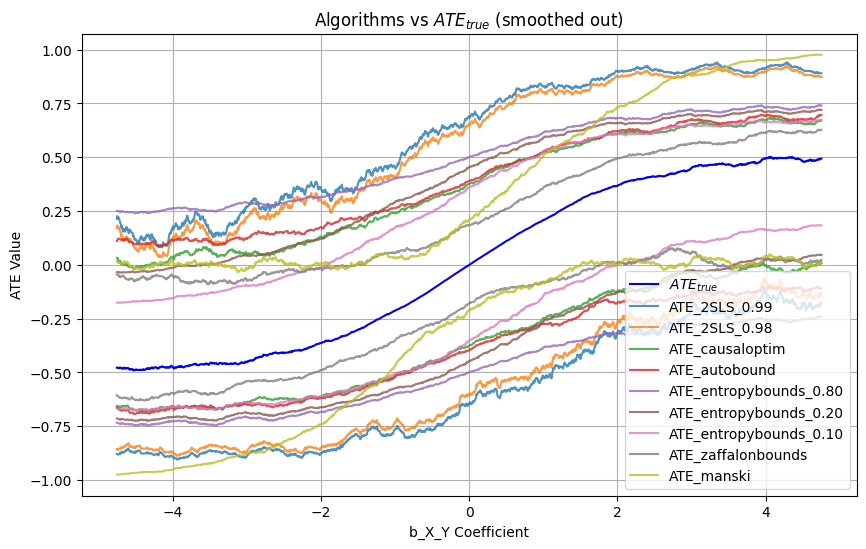

In [15]:
#ATE Evaluation
PlottingUtil.print_bound_statistics_table(results, algs, 'ATE')
PlottingUtil.plot_smoothed_query_vs_bounds(results, 'ATE', ATE_algs, 100)

In [ ]:
#PNS Evaluation
PlottingUtil.print_bound_statistics_table(results, algs, 'ATE')
PlottingUtil.plot_smoothed_query_vs_bounds(results, 'ATE', ATE_algs, 100)